In [9]:
import json

### The alert packet sent through the Lasair system
The 3 cutout images have been removed, and the remainder converted to JSON. All the original content is preserved.
Here we see some examples of the three main data packets:
- `diaObject`: Properties of the astrophysical object such as lightcurve features and proper motion
- `diaSource`: Each represents a detection of an object that is >5 sigma from the reference
- `diaForcedSource`; Each represents a detection of an object

In [10]:
# First the diaObject
with open('json/99999999999.json') as f:
    alert = json.loads(f.read())
obj = alert['diaObject']
print('%d attributes in diaObject' % len(obj.keys()))
print(json.dumps(obj, indent=2))

82 attributes in diaObject
{
  "diaObjectId": 3068429242346766568,
  "ra": 280.53729156919815,
  "raErr": 1.1405234545236453e-05,
  "decErr": 2.017170118051581e-05,
  "ra_dec_Cov": -2.6549376846290995e-12,
  "radecMjdTai": 60488.07054931704,
  "pmRa": null,
  "pmRaErr": null,
  "pmDec": null,
  "pmDecErr": null,
  "parallax": null,
  "parallaxErr": null,
  "pmRa_pmDec_Cov": null,
  "pmRa_parallax_Cov": null,
  "pmDec_parallax_Cov": null,
  "pmParallaxLnL": null,
  "pmParallaxChi2": null,
  "pmParallaxNdata": 0,
  "u_psfFluxMean": null,
  "u_psfFluxMeanErr": null,
  "u_psfFluxSigma": null,
  "u_psfFluxChi2": null,
  "u_psfFluxNdata": 0,
  "u_fpFluxMean": null,
  "u_fpFluxMeanErr": null,
  "u_fpFluxSigma": null,
  "g_psfFluxMean": null,
  "g_psfFluxMeanErr": null,
  "g_psfFluxSigma": null,
  "g_psfFluxChi2": null,
  "g_psfFluxNdata": 0,
  "g_fpFluxMean": null,
  "g_fpFluxMeanErr": null,
  "g_fpFluxSigma": null,
  "r_psfFluxMean": 1476.48583984375,
  "r_psfFluxMeanErr": 306.79681396484375

In [11]:
# Then a diaSource
with open('json/diaSource.json') as f:
    src = json.loads(f.read())
print('%d attributes in diaSource' % len(src.keys()))
print(json.dumps(src, indent=2))

131 attributes in diaSource
{
  "diaSourceId": 3068394727981187617,
  "visit": 7024062500766,
  "detector": 0,
  "diaObjectId": 3068394709727576424,
  "ssObjectId": 0,
  "parentDiaSourceId": 0,
  "midpointMjdTai": 60487.399151209436,
  "ra": 280.84167172238614,
  "raErr": 5.224281721893931e-06,
  "decErr": 7.89316891314229e-06,
  "ra_dec_Cov": 4.372064342506032e-12,
  "x": 955.6641845703125,
  "xErr": null,
  "y": 1136.1016845703125,
  "yErr": null,
  "x_y_Cov": null,
  "centroid_flag": false,
  "apFlux": -14048.7373046875,
  "apFluxErr": 1254.7178955078125,
  "apFlux_flag": false,
  "apFlux_flag_apertureTruncated": false,
  "snr": 14.663597106933594,
  "psfFlux": 11240.3251953125,
  "psfFluxErr": 828.338623046875,
  "psfRa": null,
  "psfRaErr": null,
  "psfDec": null,
  "psfDecErr": null,
  "psfFlux_psfRa_Cov": null,
  "psfFlux_psfDec_Cov": null,
  "psfRa_psfDec_Cov": null,
  "psfLnL": null,
  "psfChi2": 3021.782958984375,
  "psfNdata": 1681,
  "psfFlux_flag": false,
  "psfFlux_flag_e

In [12]:
# And a diaForcedSouurce
with open('json/diaForcedSource.json') as f:
    fsrc = json.loads(f.read())
print('%d attributes in diaForcedSource' % len(fsrc.keys()))
print(json.dumps(fsrc, indent=2))

10 attributes in diaForcedSource
{
  "diaForcedSourceId": 3068394727981195731,
  "diaObjectId": 3068394709727576424,
  "ra": 4.901611667116573,
  "visit": 7024062500766,
  "detector": 0,
  "psfFlux": 7962.67041015625,
  "psfFluxErr": 830.54638671875,
  "midpointMjdTai": 60487.399151209436,
  "band": "r",
  "decl": -0.8386199138280754
}


### Plot a Lightcurve
The `alert` is a `diaObject` + multiple `diaSource`s and `diaForcedSources`
We set up a colour scheme and use it to plot the `psfFlux` from the `diaSources`

In [13]:
with open('json/99999999999.json') as f:
    alert = json.loads(f.read())

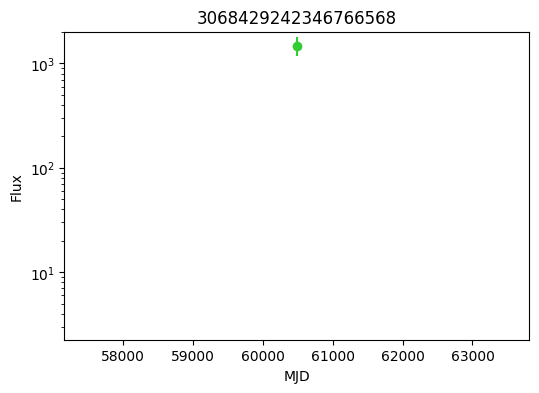

In [14]:
import matplotlib.pyplot as plt
color    = {'u':"#9900cc", 'g':"#3366ff", 'r':"#33cc33", 'i':"#ffcc00", 'z':"#ff0000", 'y':"#cc6600"}
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')
     
for band in color.keys():
    tb = []
    fb = []
    fberr = []
    for s in alert['diaSourcesList']:
        if s['band'] == band:
            tb   .append(s['midpointMjdTai'])
            fb   .append(s['psfFlux'])
            fberr.append(s['psfFluxErr'])
    ax.errorbar(tb, fb, yerr=fberr, fmt='o', color=color[band], label=band)   
plt.title(alert['diaObject']['diaObjectId'])
plt.xlabel("MJD")
plt.ylabel("Flux")
plt.show()

## Lasair's Object Schema
The other notebooks in this series explain how some of these features are computed from the lightcurve and other information.
Below is a list of Lasair's "core|" atributes, that are available in the schema browser to be used in the 
SELECT or WHERE clauses of a Lasair filter. All the other attributes from the `diaObject` are also available to the expert user.
```
-- Basic information: ID, position, proper motion
diaObjectId	ID for this object
ra	Mean RA of this object
decl	Mean Dec of this object
pmRa	Proper motion in right ascension (mas/yr)
pmDec	Proper motion in declination (mas/yr)

-- Lightcurve interval: MJD of the first and last diaSource of this diaObject
lastDiaSourceMJD	Latest MJD of a diaSource
firstDiaSourceMJD	Earliest MJD of a diaSource

-- Latest Flux: Most recent fluxes with errors
u_psfFlux	Latest u flux (nJy)
u_psfFluxMean	Weighted mean point-source model magnitude for u filter. (nJy)
u_psfFluxMeanErr	Standard error of u_psfFluxMean. (nJy)
g_psfFlux	Latest g flux (nJy)
g_psfFluxMean	Weighted mean point-source model magnitude for g filter. (nJy)
g_psfFluxMeanErr	Standard error of g_psfFluxMean. (nJy)
r_psfFlux	Latest r flux (nJy)
r_psfFluxMean	Weighted mean point-source model magnitude for r filter. (nJy)
r_psfFluxMeanErr	Standard error of r_psfFluxMean. (nJy)
i_psfFlux	Latest i flux (nJy)
i_psfFluxMean	Weighted mean point-source model magnitude for i filter. (nJy)
i_psfFluxMeanErr	Standard error of i_psfFluxMean. (nJy)
z_psfFlux	Latest z flux (nJy)
z_psfFluxMean	Weighted mean point-source model magnitude for z filter. (nJy)
z_psfFluxMeanErr	Standard error of z_psfFluxMean. (nJy)
y_psfFlux	Latest y flux (nJy)
y_psfFluxMean	Weighted mean point-source model magnitude for y filter. (nJy)
y_psfFluxMeanErr	Standard error of y_psfFluxMean. (nJy)

-- Counting: Counts of diaSources of different bands
nSources	Number of diaSources associated with this diaObject
nuSources	Number of u sources
ngSources	Number of g sources
nrSources	Number of r sources
niSources	Number of i sources
nzSources	Number of z sources
nySources	Number of y sources

-- Other/Nearest objects: Other/Nearest objects from LSST and other catalogs
tns_name	TNS name of this object if it exists
nearbyObj1	Id of the closest nearby object.
nearbyObj1Dist	Distance to nearbyObj1 (arcsec)
nearbyObj1LnP	Natural log of the probability that the observed diaObject is the same as the nearbyObj1.

-- Absolute magnitude: Brightness at 1 parsec
absMag	Peak absolute magnitude (extinction corrected) if host galaxy with distance available
absMagMJD	Peak absolute magnitude time if host galaxy with distance available

-- BazinBlackBody (BBB): Lightcurve fit as Bazin or Exp in time, Blackbody in wavelength
BBBRiseRate	Fitted Bazin or Exp rise rate
BBBFallRate	Fitted Bazin fall rate or NULL if Exp
BBBTemp	Fitted Bazin temperature, (kiloKelvins)
BBBPeakFlux	If Bazin fit, the peak flux (nJy)
BBBPeakMJD	If Bazin fit, the time of the peak brightness
BBBPeakAbsMag	If Bazin fit and Sherlock host with distance, the peak absolute magnitude

-- Milky Way: Galactic latitude and extinction
glat	Galactic latitude
ebv	Extinction E(B-V) Schlegel, Finkbeiner & Davis (1998)

-- Jump detector: Number of sigma jump from 20 day mean
jumpFromMean20	Number of sigma jump of recent flux from previous 20 days

-- Pair colours: Colours from 33-minute paired diaSources
latestPairMJD	Latest pair MJD
latestPairColourMag	Magnitude difference from latest pair
latestPairColourBands	Bands used for latest pair colour, eg g-r, u-r
latestPairColourTemp	Extinction corrected effective temperature from latest pair, kiloKelvin
penultimatePairMJD	Penultimate pair MJD
penultimatePairColourMag	Magnitude difference from Penultimate pair
penultimatePairColourBands	Bands used for penultimate pair colour, eg g-r, u-r
penultimatePairColourTemp	Extinction corrected effective temperature from penultimate pair, kiloKelvin


```